In [65]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from os.path import join as pjoin
from os import linesep
diri='../data/coex'

#Load data
func_net=lambda x:np.loadtxt(pjoin(diri,'lv{}_net.tsv.gz'.format(x))).astype(bool)
with open(pjoin(diri,'1_gene.txt'),'r') as f:
    t=f.readlines()
t=np.array([x.strip() for x in t])
tdict=dict(zip(t,range(len(t))))

# Histograms

Co-expression with 0 GO covariates removed.
Number of nodes in full network: 503
Number of edges in full network: 1533
Number of nodes in major connected component: 414
Number of edges in major connected component: 1445


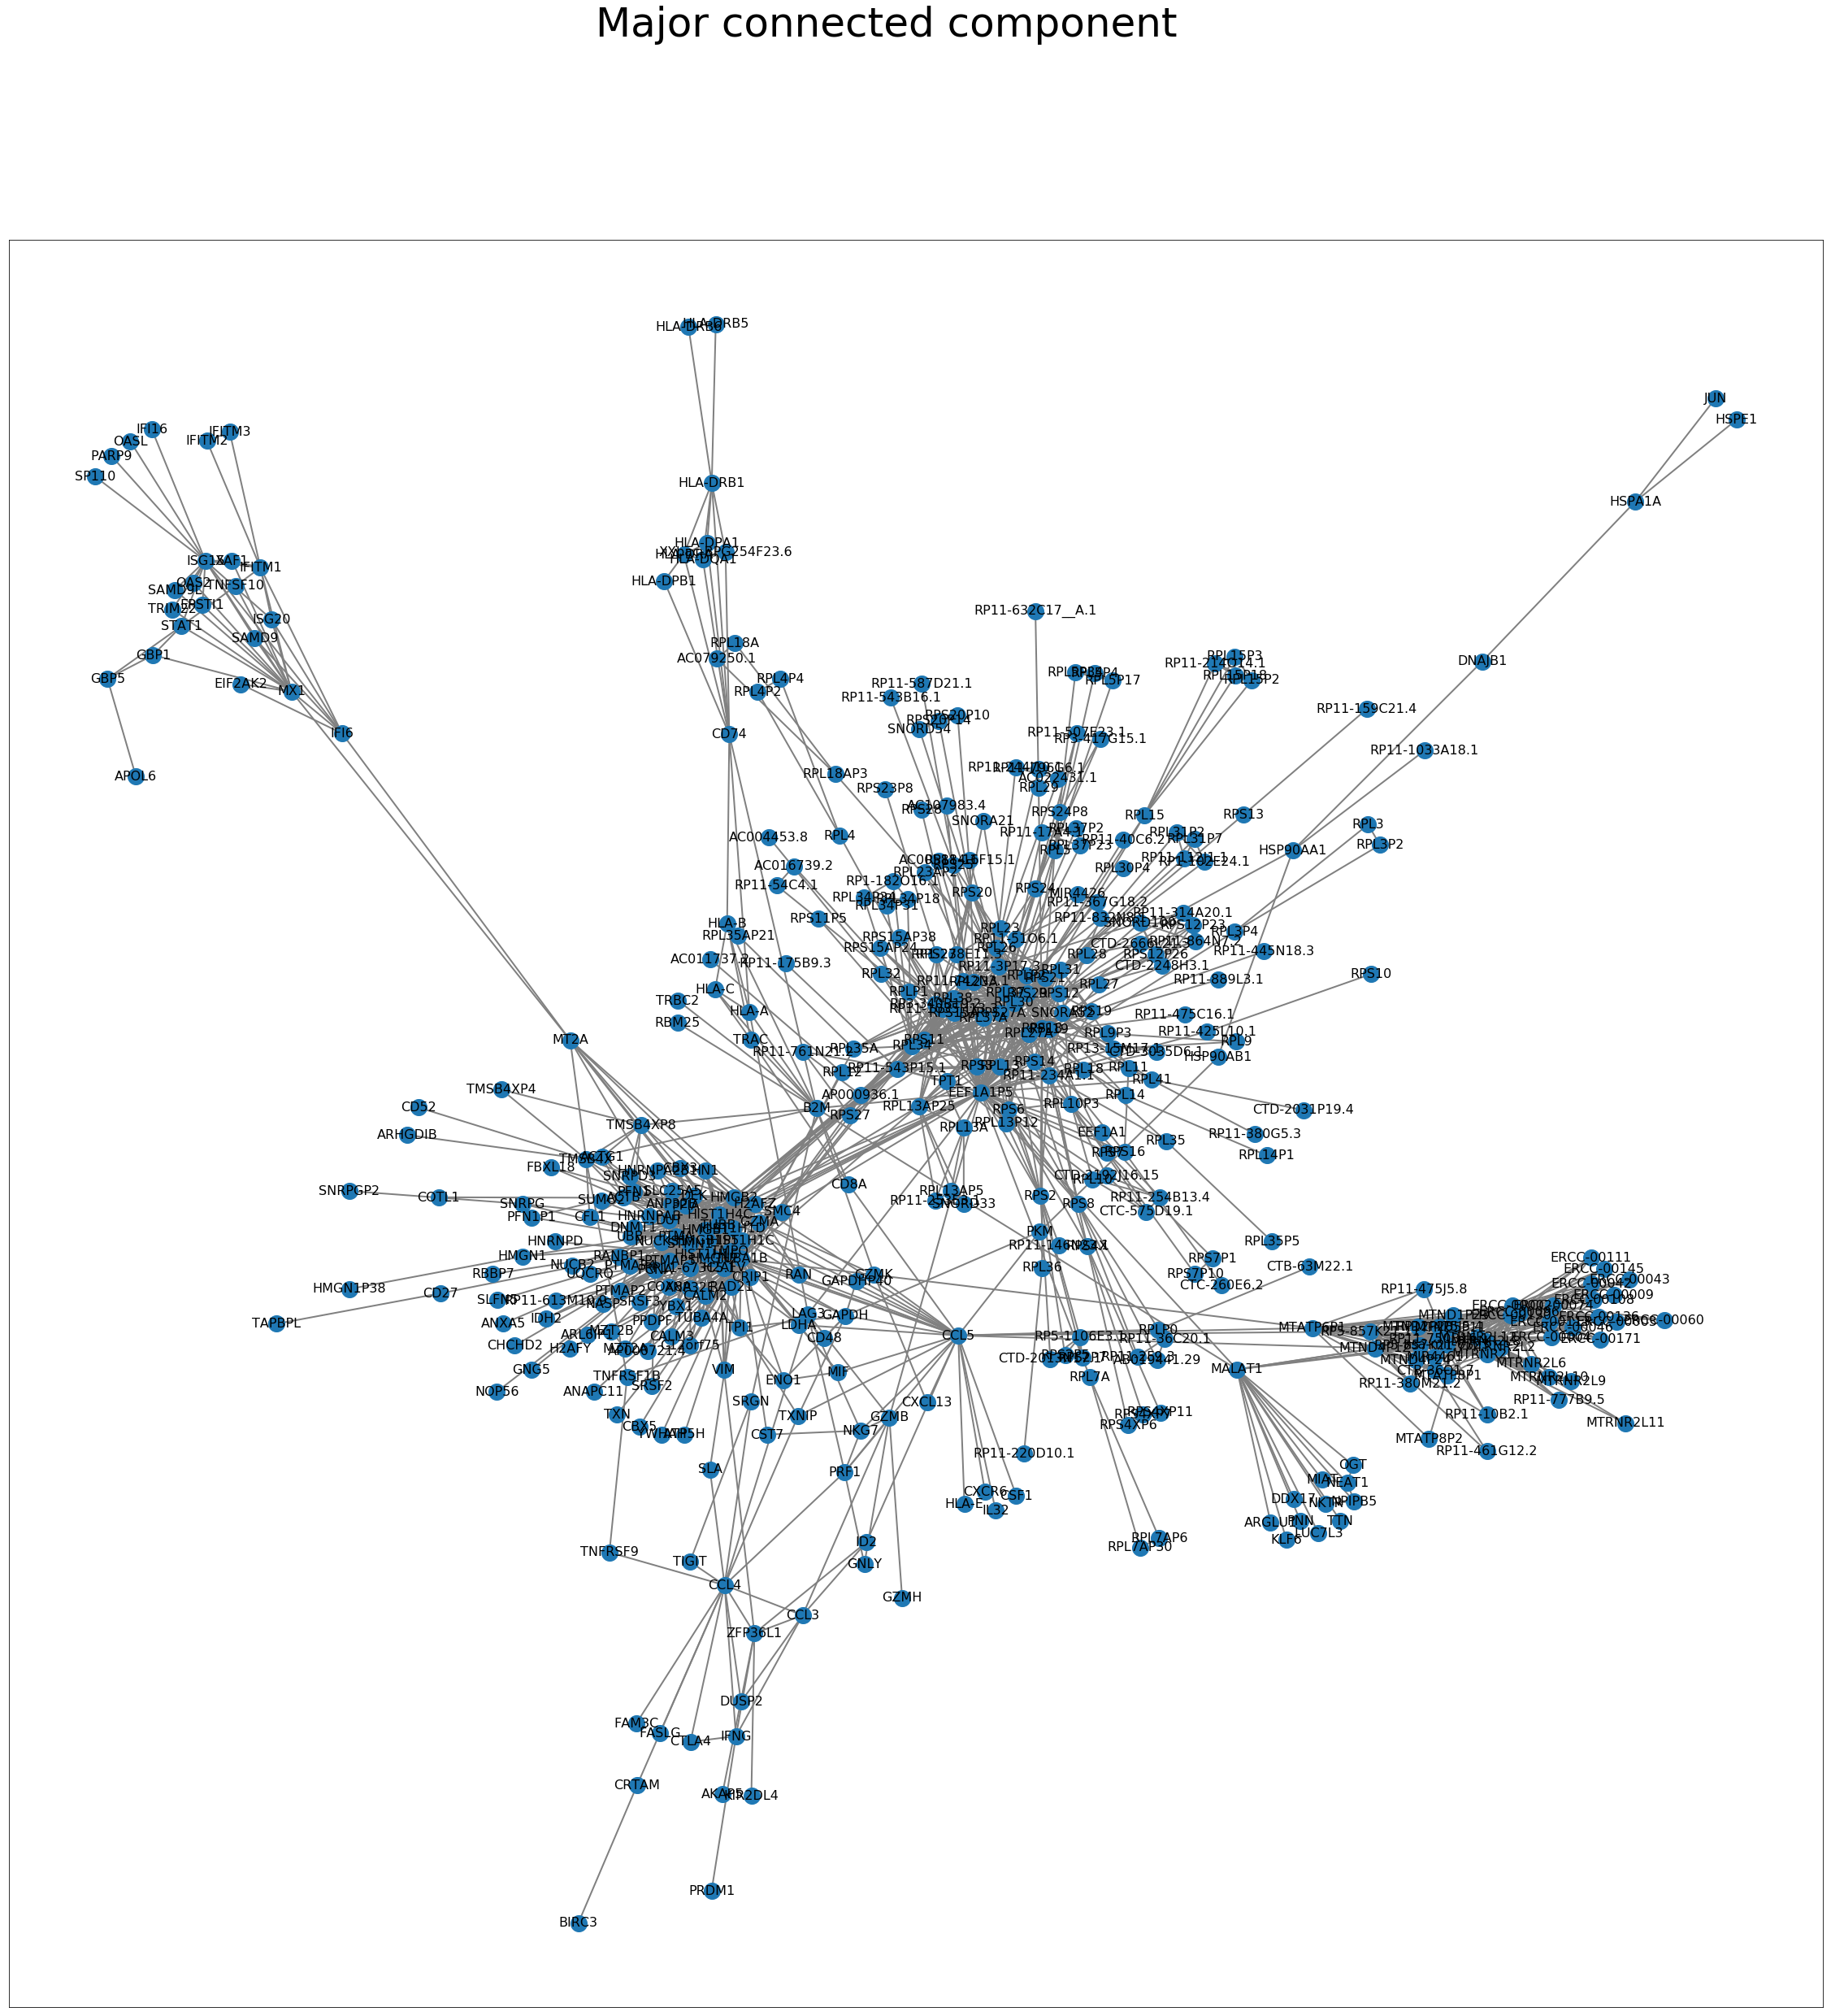

Co-expression with 1 GO covariates removed.
Number of nodes in full network: 486
Number of edges in full network: 1118
Number of nodes in major connected component: 233
Number of edges in major connected component: 827


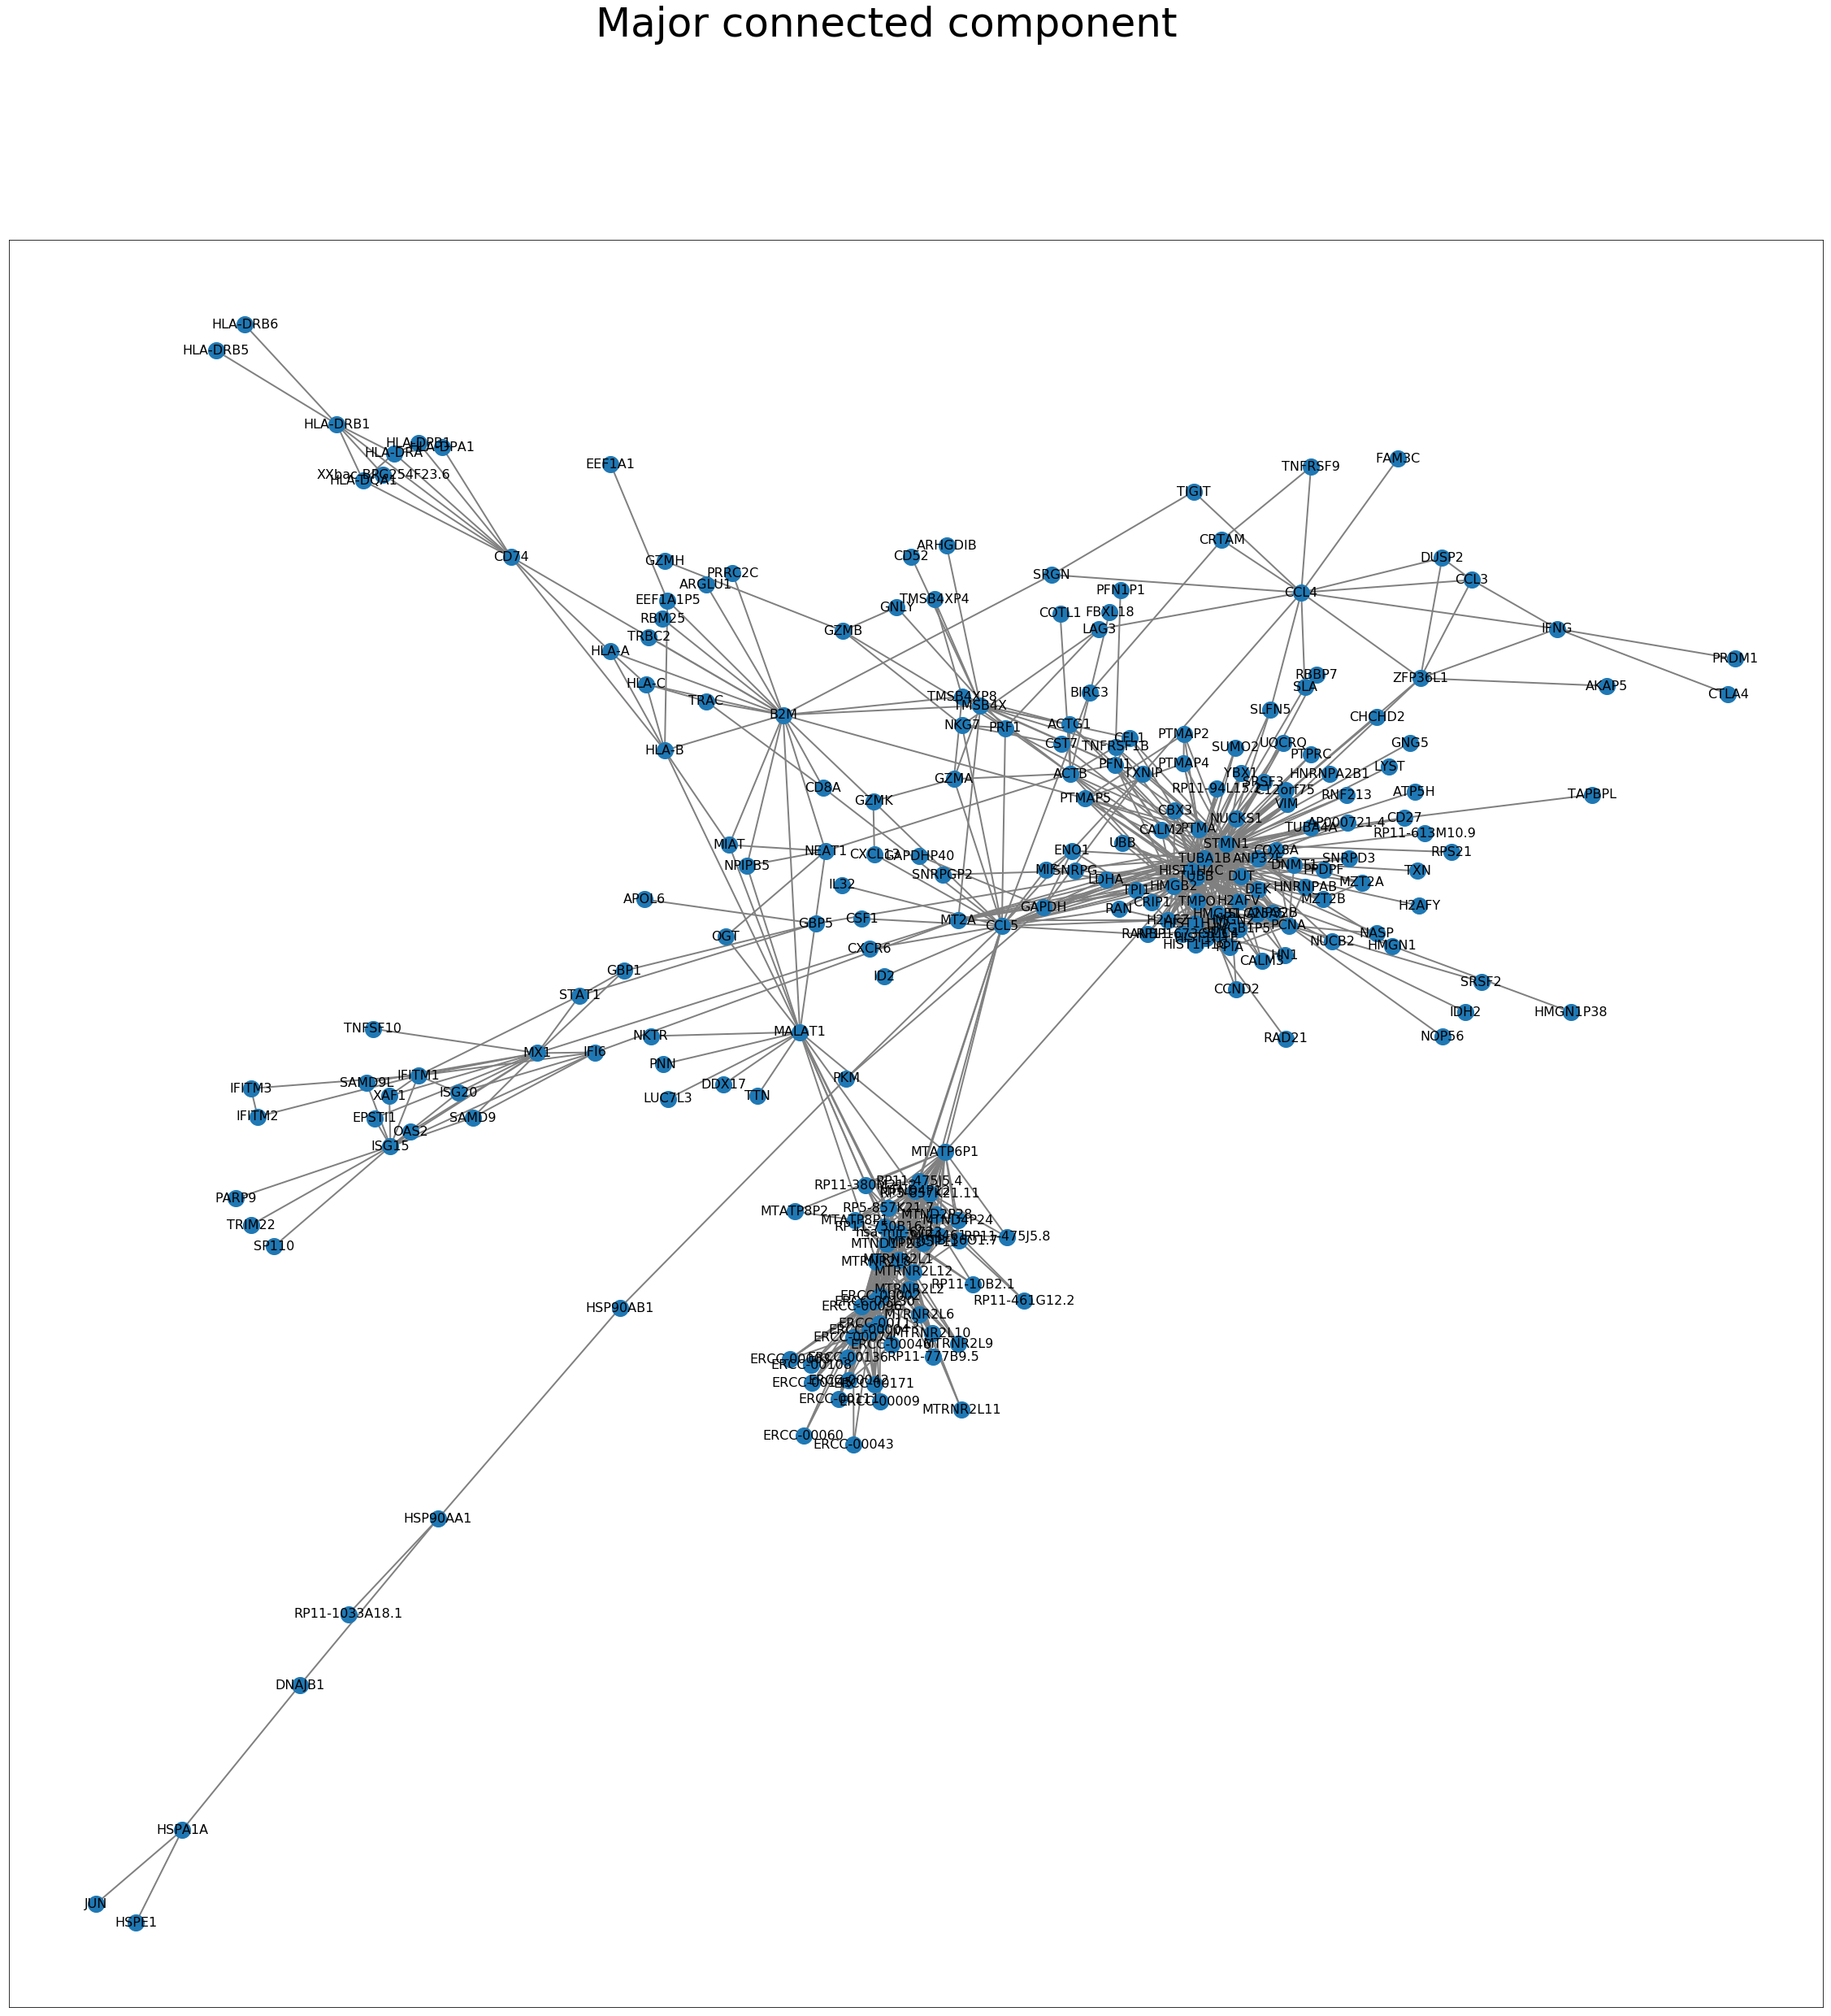

Co-expression with 2 GO covariates removed.
Number of nodes in full network: 482
Number of edges in full network: 992
Number of nodes in major connected component: 229
Number of edges in major connected component: 700


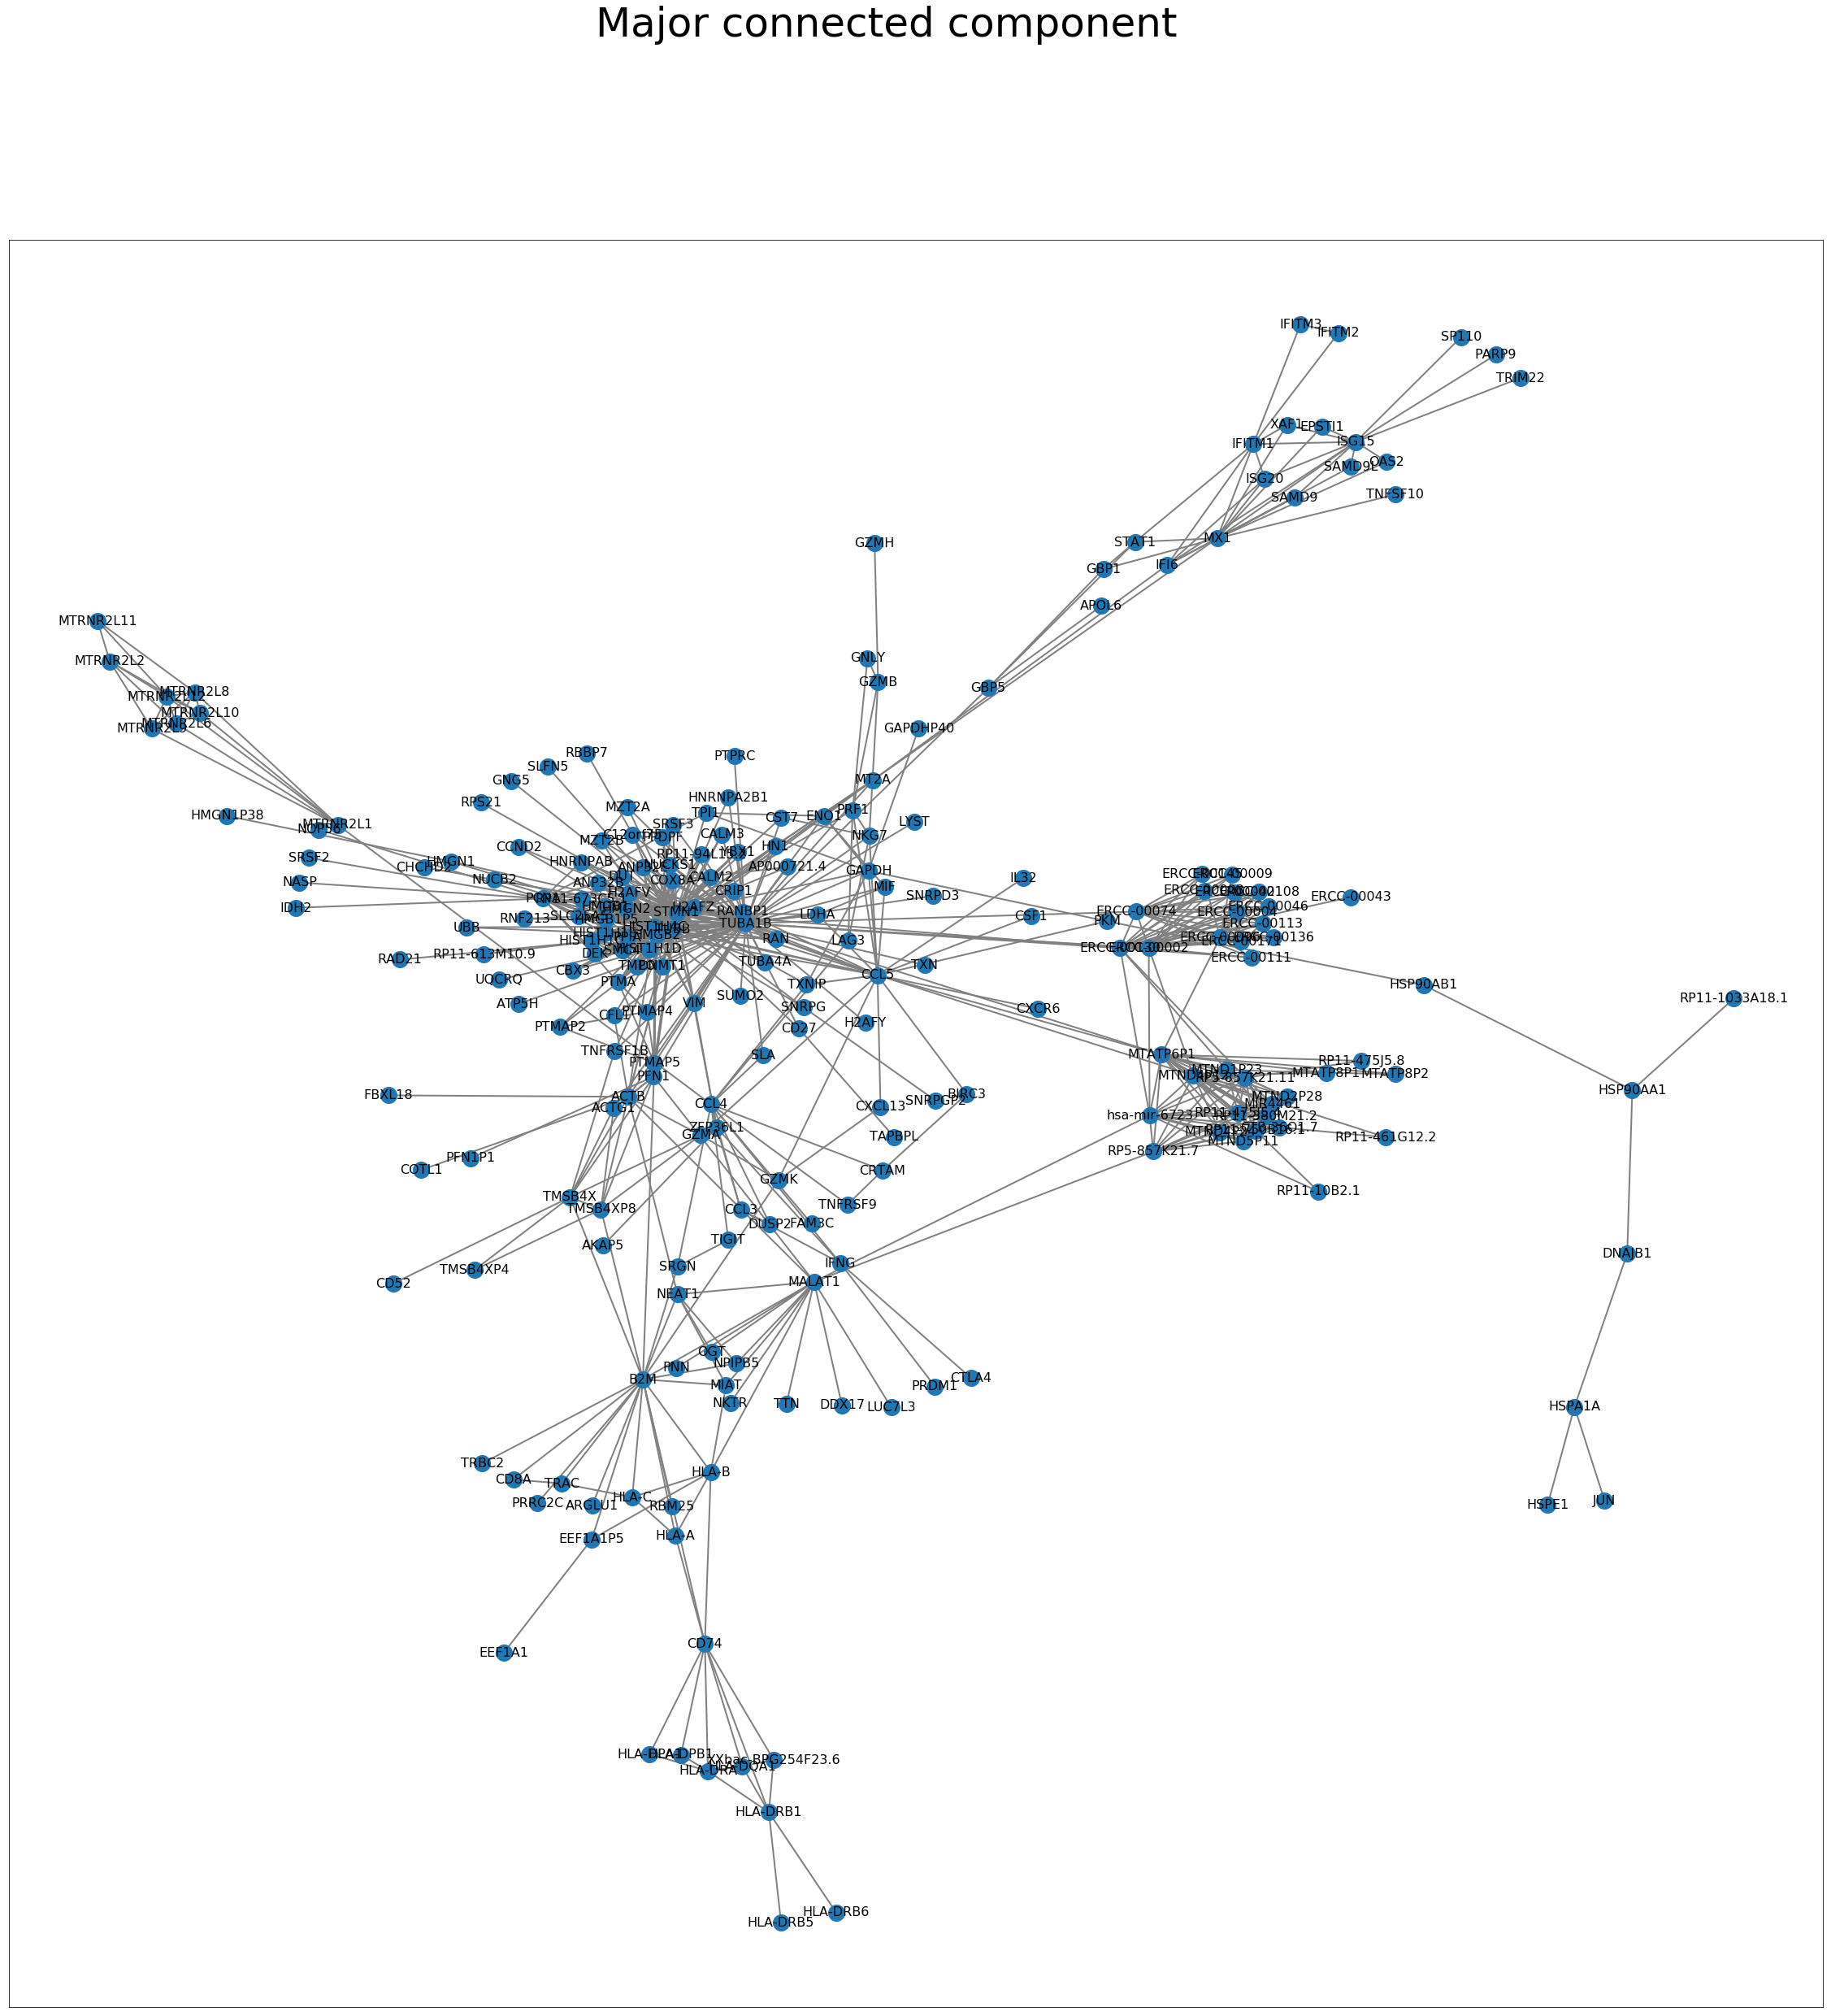

Co-expression with 3 GO covariates removed.
Number of nodes in full network: 479
Number of edges in full network: 986
Number of nodes in major connected component: 226
Number of edges in major connected component: 694


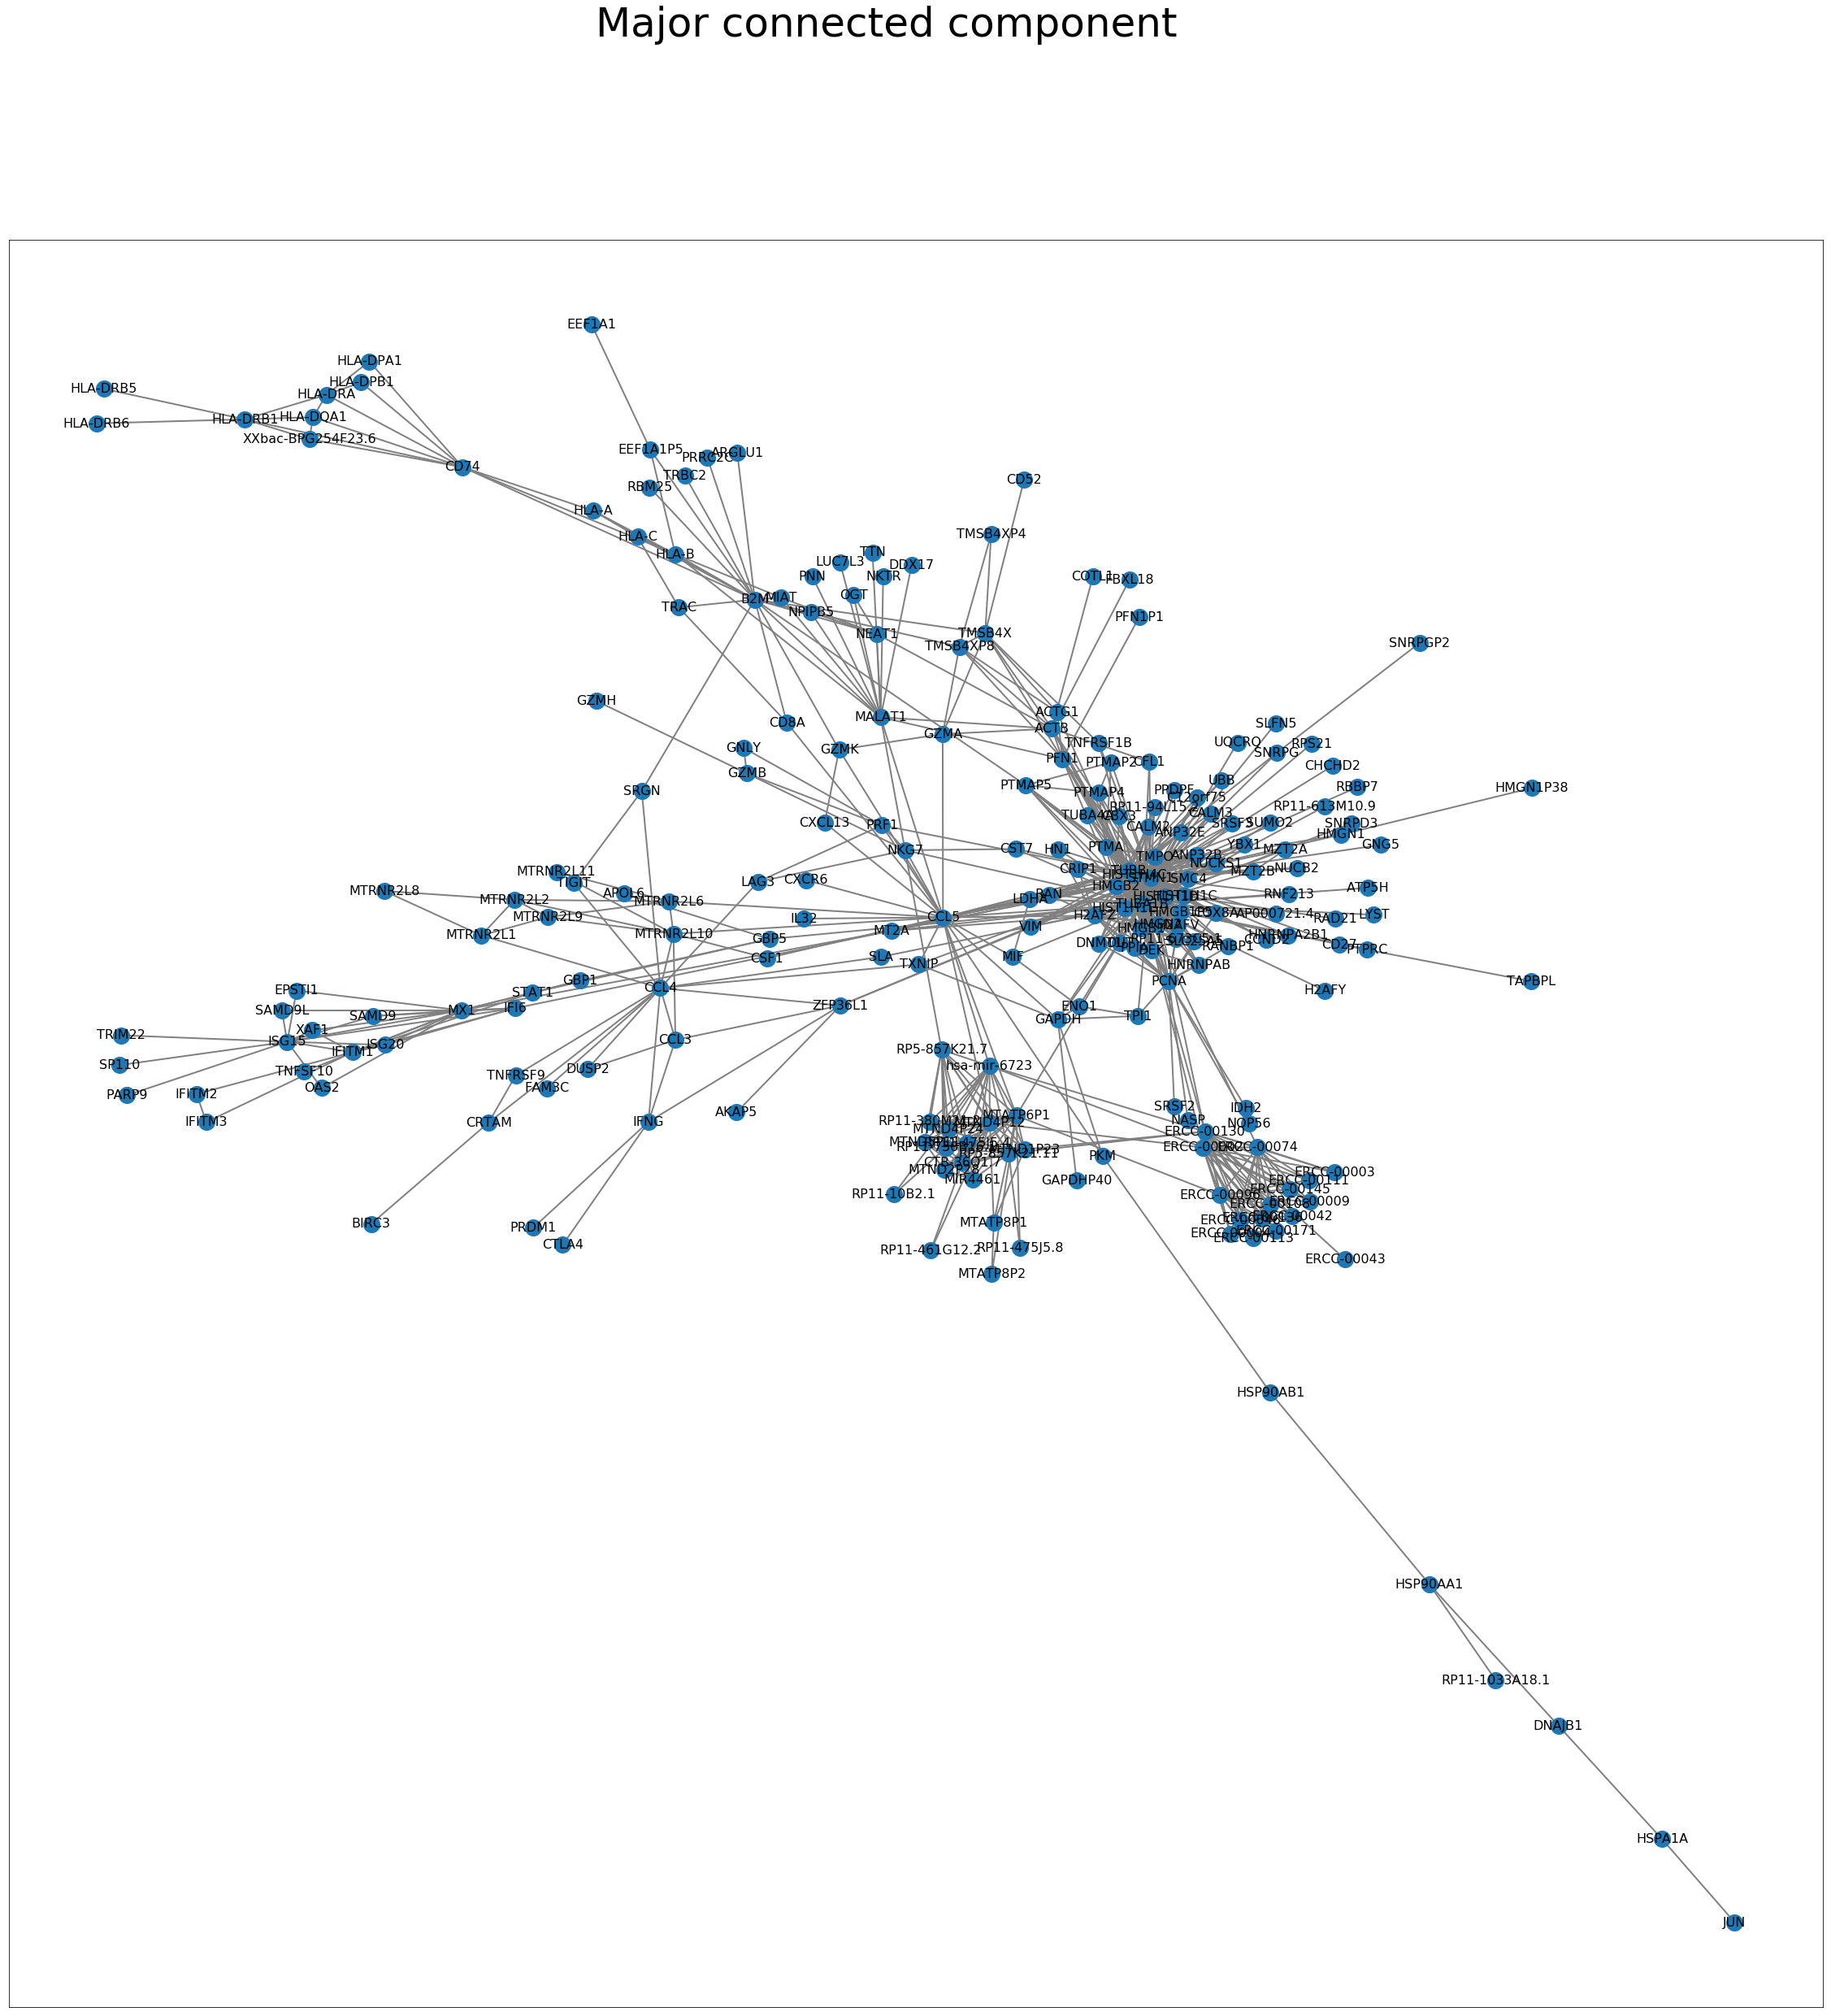

Co-expression with 4 GO covariates removed.
Number of nodes in full network: 461
Number of edges in full network: 907
Number of nodes in major connected component: 199
Number of edges in major connected component: 608


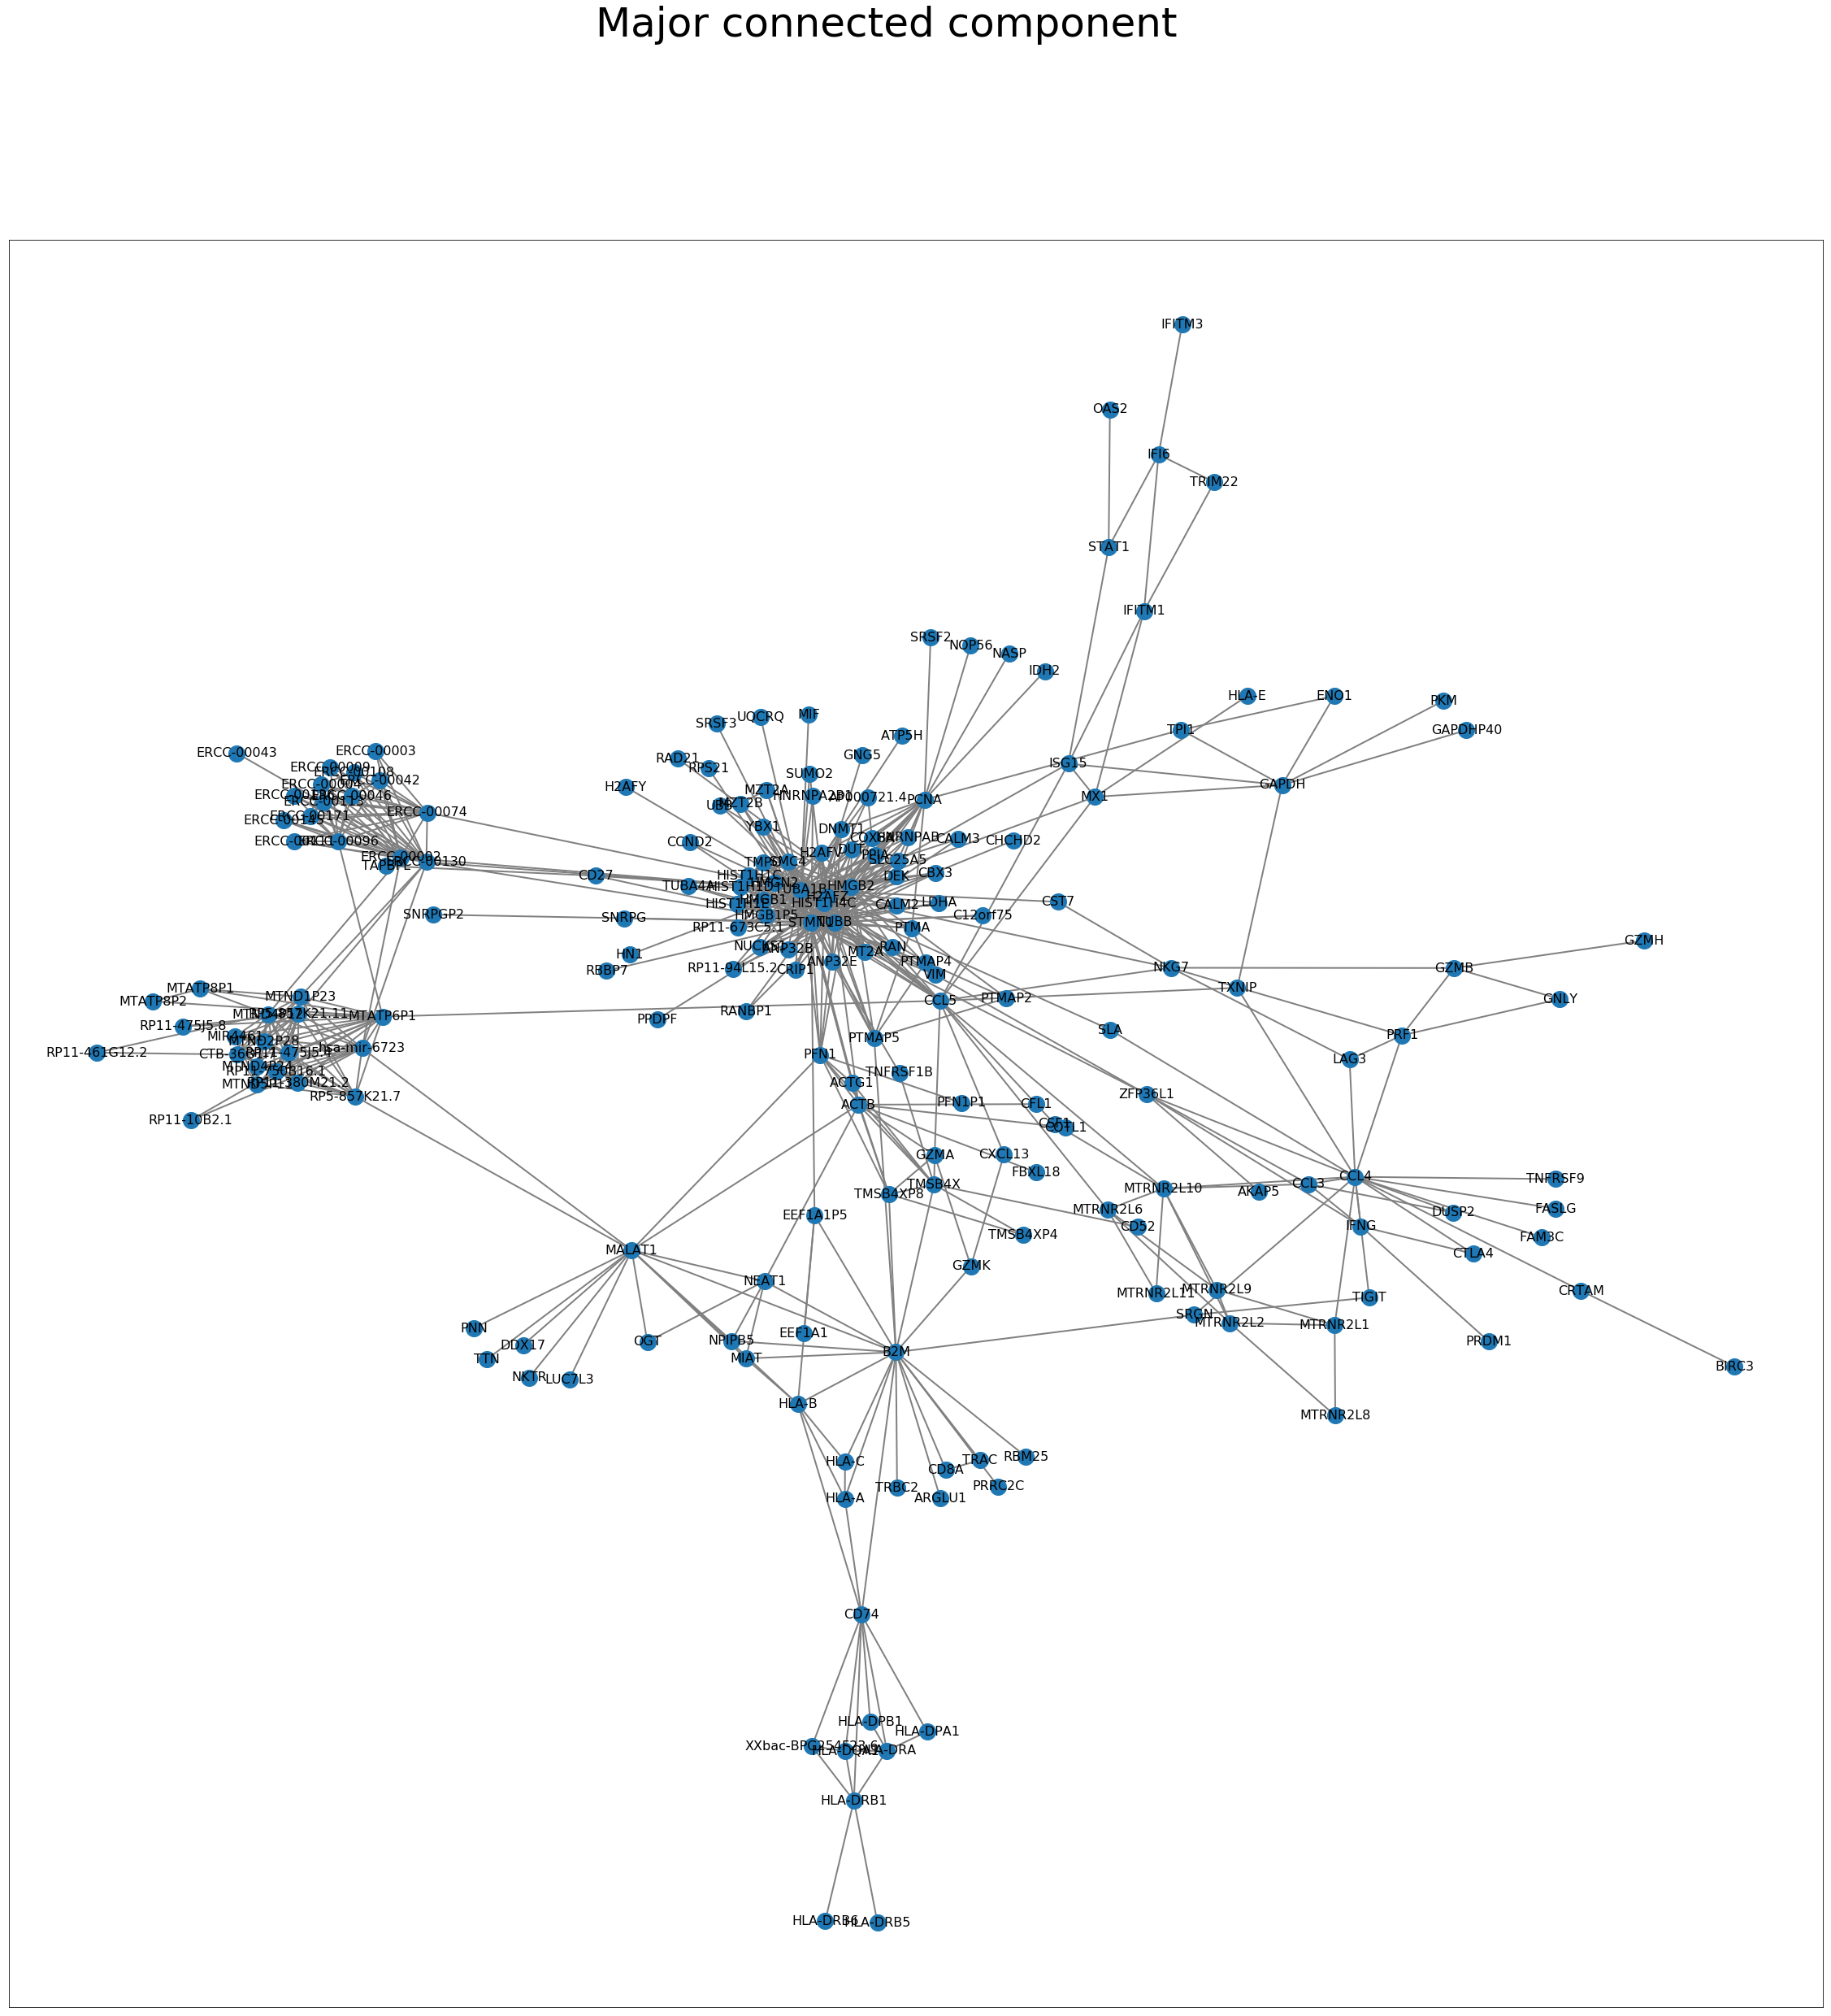

Co-expression with 5 GO covariates removed.
Number of nodes in full network: 458
Number of edges in full network: 918
Number of nodes in major connected component: 198
Number of edges in major connected component: 620


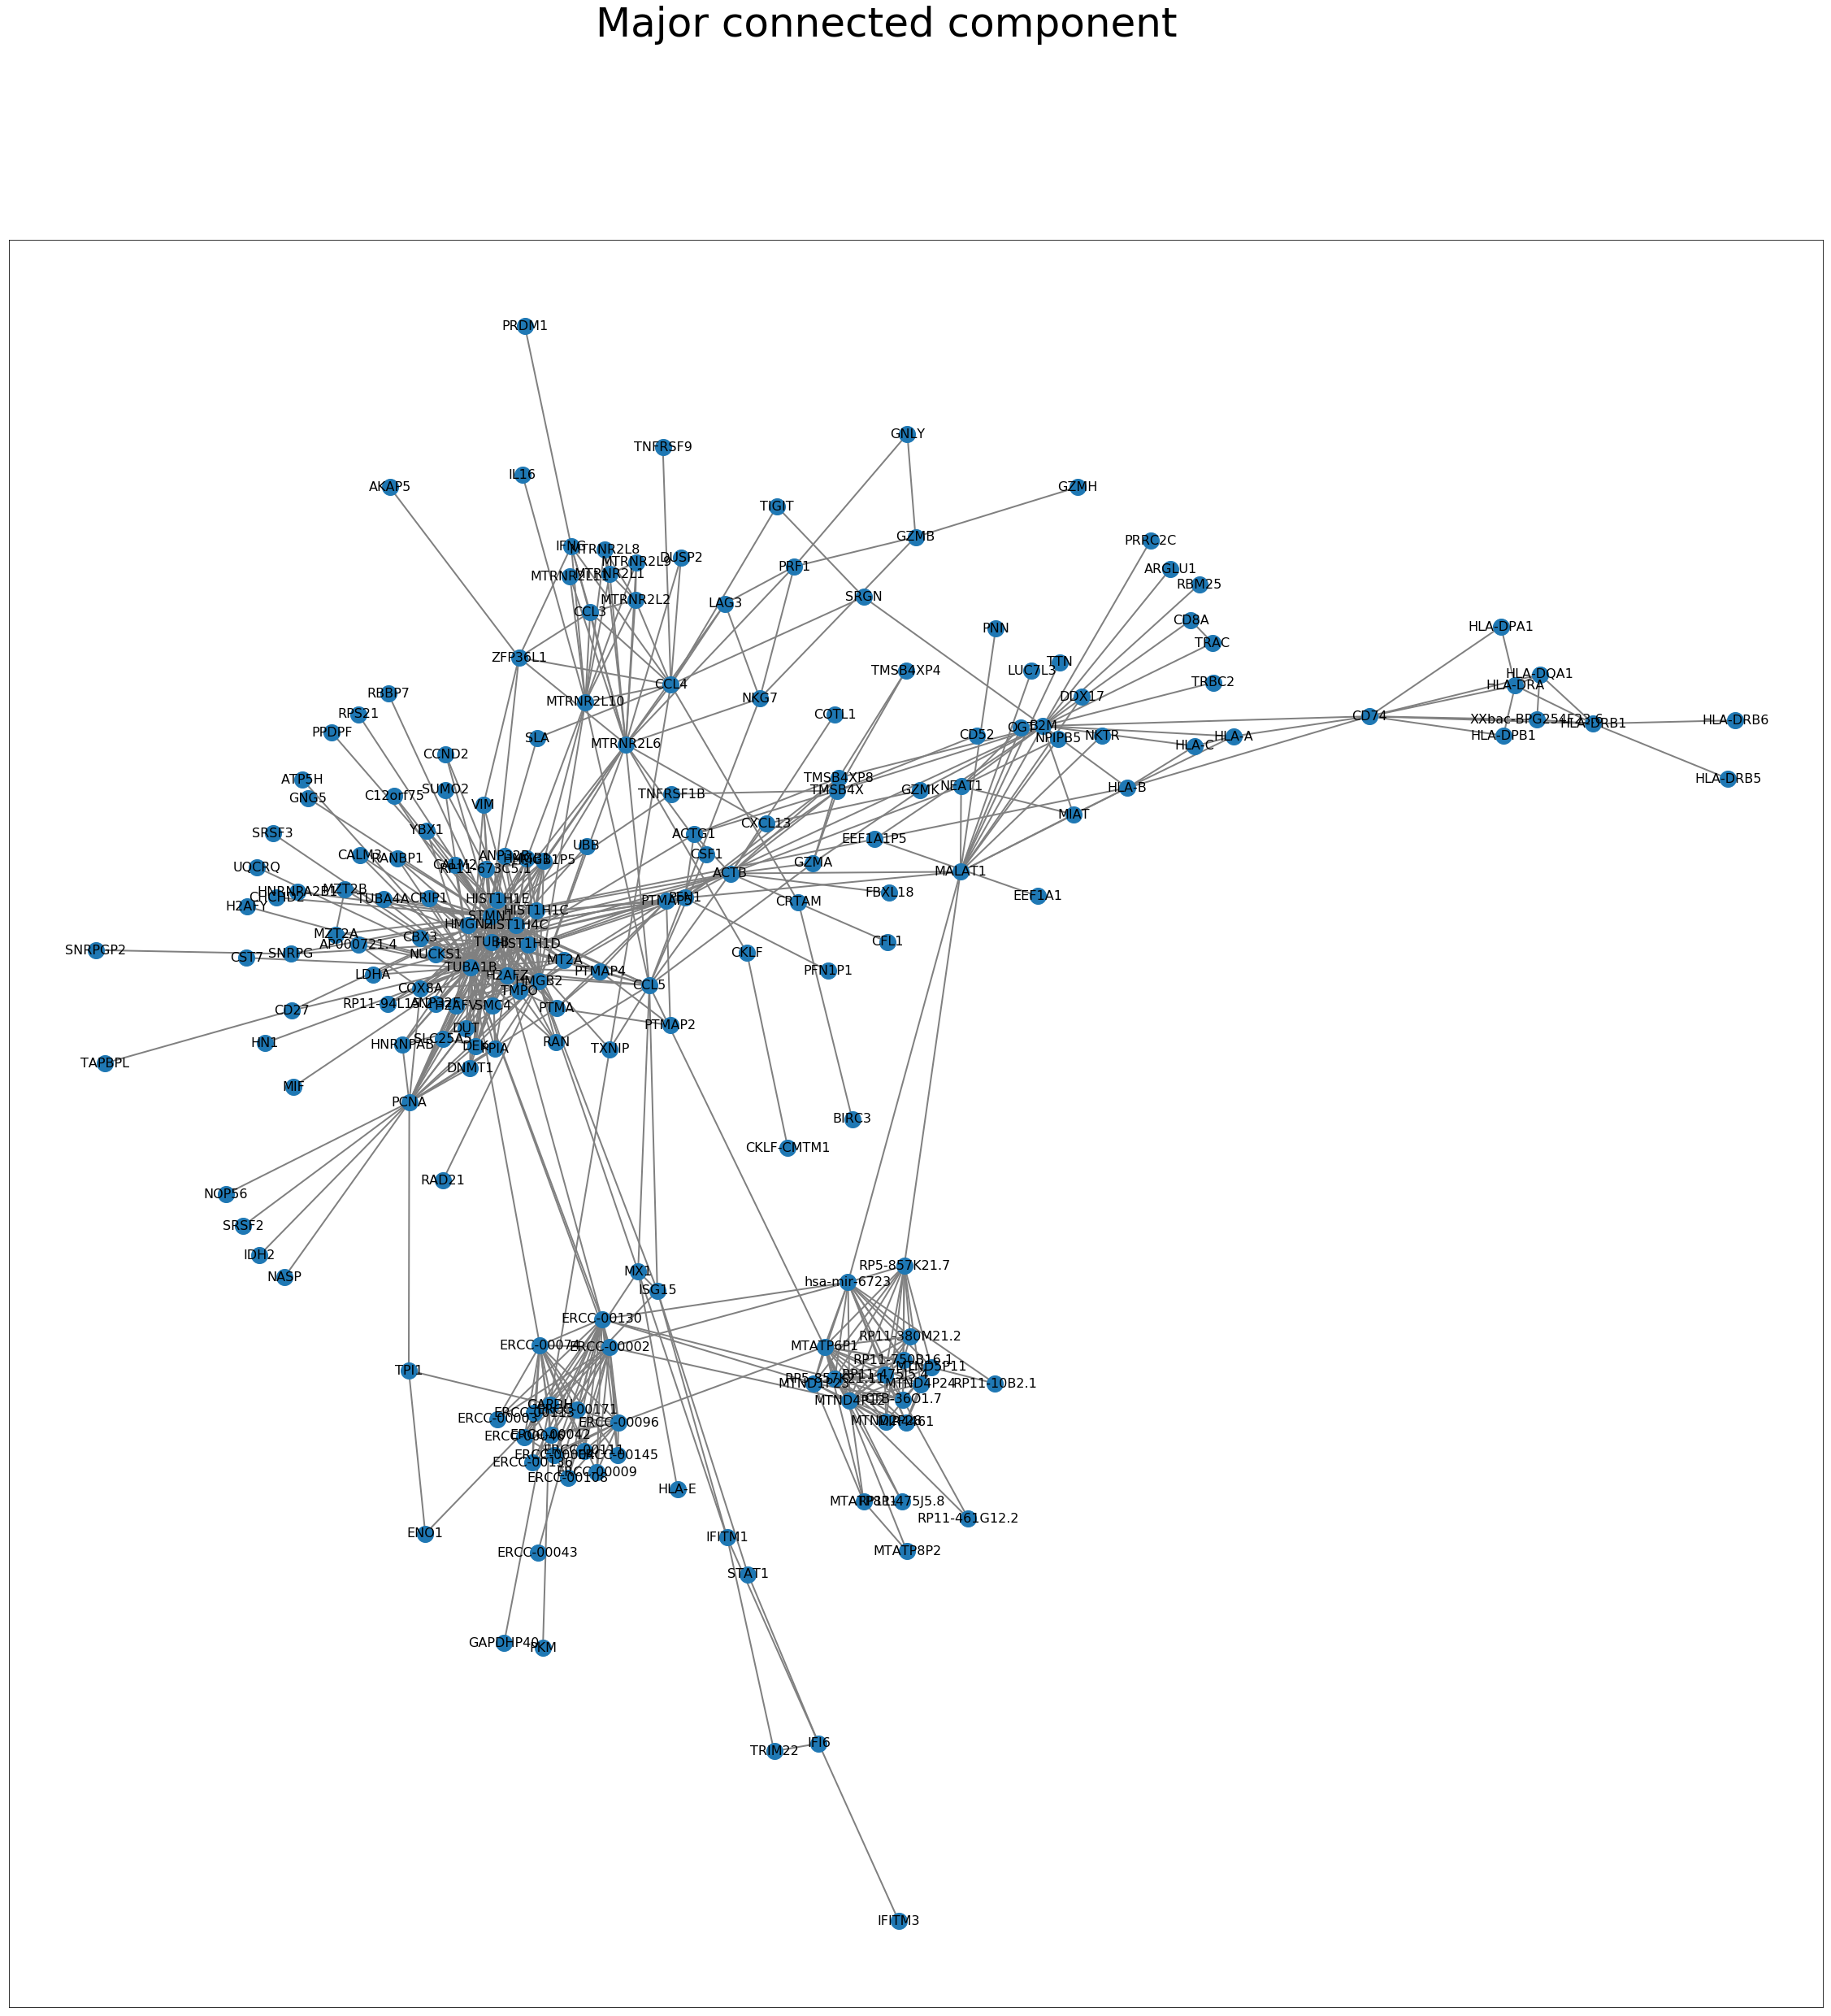

In [68]:
figscale=2

for xi in range(6):
	print('Co-expression with {} GO covariates removed.'.format(xi))
	net=func_net(xi)
	net|=net.T
	t1=net.any(axis=1)>0
	net=net[t1][:,t1]
	tnet=t[t1]
	print('Number of nodes in full network: {}'.format(net.shape[0]))
	print('Number of edges in full network: {}'.format(net.sum()//2))
	#To major connected component
	t1=np.zeros_like(net)
	net2=net.copy()
	while (t1!=net2).any():
		t1=net2.copy()
		net2|=np.matmul(net2,net2)
	t1=net2.sum(axis=0)
	t1=t1==t1.max()
	net=net[t1][:,t1]
	tnet=tnet[t1]
	print('Number of nodes in major connected component: {}'.format(net.shape[0]))
	print('Number of edges in major connected component: {}'.format(net.sum()//2))
	#Draw here
	net2=pd.DataFrame(net,index=tnet,columns=tnet)
	net3=nx.to_networkx_graph(net2)
	f=plt.figure(figsize=(20*figscale,20*figscale))
	nx.draw_networkx(net3,node_size=200*figscale,font_size=8*figscale,width=1*figscale,edge_color=[0.5]*3);
	f.suptitle('Major connected component',fontsize=25*figscale);
	plt.show()
	#Output network to file (e.g. to draw in Cytoscape)
	net2=np.array(np.nonzero(net)).T
	net2=net2[net2[:,0]<net2[:,1]]
	net2=[['src','dst']]+[[tnet[y] for y in x] for x in net2]
	net2=linesep.join(['\t'.join(x) for x in net2])+linesep
	with open(pjoin(diri,'lv{}.tsv'.format(xi)),'w') as f:
		f.write(net2)